# <center> Coupled Spring Mass system  </center> 

## <center> Python Code. </center> 

I will suggest you to *just play only* with the output of the code below because it is too complicated. and if you wanna study it scientifically i have written the simple code in the next cell


In [1]:
import numpy as np
from ipywidgets import*
from vpython import*
canva = canvas(background=color.white,height=400,width=900)

RL = 2 ## Relaxed  length of spring

shift_const = -2*RL ## I just add this to make all the figures symmettric in vpython canvas

cube1 = box(pos = vector(shift_const+RL+0.25,0,0),radius = 0.5,color = color.red,length = 0.5,width = 0.5,height = 0.5)
cube2 = box(pos = vector(shift_const+2*RL+0.5+0.25,0,0),radius = 0.5,color = color.red,length = 0.5,width = 0.5,height = 0.5)


base1 = box(pos = vector(shift_const+0,0,0),length=0.01,height=1,width=0.1,color = color.green)
                   
base2 = box(pos = vector(shift_const+3*RL+2*0.5,0,0),length=.01,height=1,width=0.1,color = color.green)

spring1 = helix(pos = vector(shift_const+0,0,0),radius = 0.03,
                     axis = vector(1,0,0),length = RL,coils=30,
                     color = color.blue,thickness = 0.01)
spring2 = helix(pos = vector(shift_const+RL+0.5,0,0),radius = 0.03,
                     axis = vector(1,0,0),length = RL,coils=20,
                     color = color.blue,thickness = 0.01)
spring3 = helix(pos = vector(shift_const+2*RL+2*0.5,0,0),radius = 0.03,
                     axis = vector(1,0,0),length = RL,coils=30,
                color = color.blue,thickness = 0.01)



def f_main(x1,x2,k1,k2,k3,m1,m2,start): ## this function communicates with slider
    global cube1,cube2,spring1,spring2,spring3 ## they are global because we defined them above and in this loop we change their  position 
    
    ## chanding positions of shapes accoeding to slider values
    cube1.pos.x = shift_const+0.25+RL+x1 
    cube2.pos.x = shift_const+0.5+0.25+2*RL+x2
    
    spring1.length = RL+x1
    
    spring2.pos.x = shift_const+RL+0.5 +x1
    spring2.length = cube2.pos.x-0.25-spring2.pos.x
    
    spring3.pos.x = shift_const+2*RL+2*0.5 +x2
    spring3.length = abs(RL-x2)
    
    #inititial time and velocities
    t = 0
    v1 = 0
    v2 = 0
    # acceleration 
    a1 = (-k2*x1 -k1*x1 + k2*x2)/m1
    a2  = (k2*x1-k3*x2-k2*x2)/m2
    
    dt = 0.01
    

    
    
    if(start==True):

        while(t<30):
            rate(300)
            x1+= v1*dt/2  ##updating both positions
            x2 += v2*dt/2

            a1 = (-k2*x1 -k1*x1 + k2*x2)/m1 #updating acceleartion
            a2  = (k2*x1-k3*x2-k2*x2)/m2
            
            v1 += a1*dt #updating velocities
            v2 += a2*dt
            
            x1+= v1*dt/2  ##updating both positions final
            x2 += v2*dt/2
            
            t += dt ##updating time
            
            ##changing positions of cubes and spring according to newtons laws
            cube1.pos.x = shift_const+0.25+RL+x1    
            cube2.pos.x = shift_const+0.5+0.25+2*RL+x2

            spring1.length = RL+x1

            spring2.pos.x = shift_const+RL+0.5 +x1
            spring2.length = cube2.pos.x-0.25-spring2.pos.x

            spring3.pos.x = shift_const+2*RL+2*0.5 +x2
            spring3.length = abs(RL-x2)
            
#This interactive function establishes a communication with function and widgets            
interact(f_main,x1 = (-1*RL/2.5,RL/2.5,.01),x2 = (-1*RL/2.5,RL/2.5,.01),
                m1 = (0.5,10,0.5),m2 = (0.5,10,0.5),start =False,
                k1 = (0.002,5.000,0.002),k2 = (0.002,5.000,0.002),k3 = (0.002,5.000,0.002)  
        )   


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.0, description='x1', max=0.8, min=-0.8, step=0.01), FloatSlider(valu…

<function __main__.f_main(x1, x2, k1, k2, k3, m1, m2, start)>



### Things to check in Upper program.(for $m1 = m2$, and K1 = K3)
1. In phase Motion i.e. put X1 = X2 initially
1. Out Phase phase Motion i.e. put X1 = -X2 initially
3. Beats i.e. put one of the block initial displacement zero and see thee magic.


### <center> Enough VPython!!  Lets plot some data </center>

I will take in this code $m_1 = m_2$ and $k_1 = k_3$. Just to avoid putting sliders. Yeah i hate them too !!!


So Let's take $$m_1 = m_2 =1$$
 $$ k_1 = k_3 = 0.4 \ \  and \ \ k_2 = 0.07$$ 
but why 0.07? because I wrote this when <b>No  time To die</b> release date shifted due to this corona :(   
 


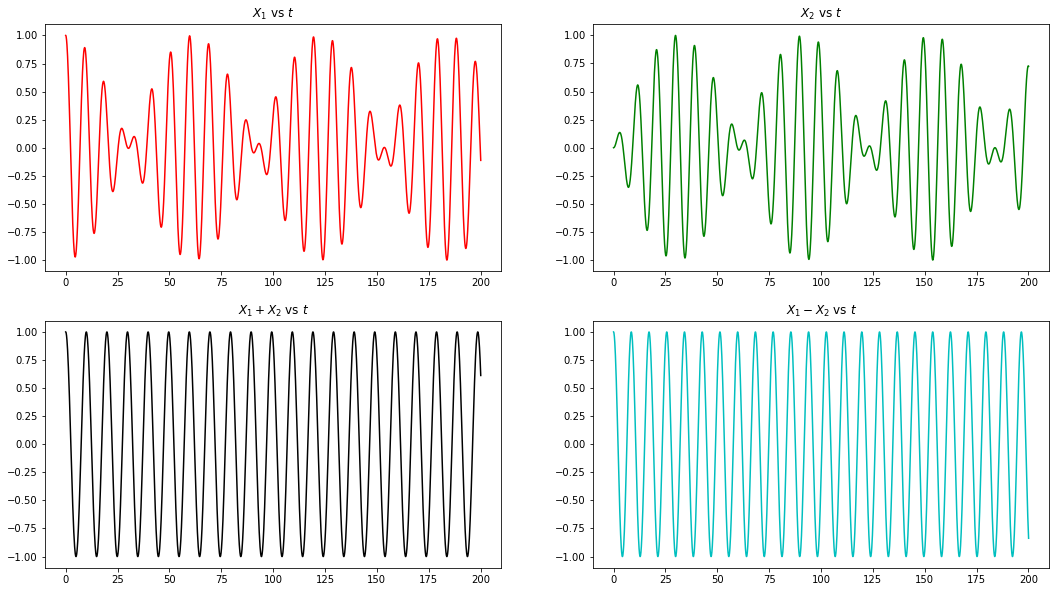

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#defining initial position
x1 = 1
x2 = 0
## spring constants
k1 =0.4
k3 = 0.4
k2 = 0.07

#initial time and velocities
t = 0
v1 = 0
v2 = 0
#accelerations
a1 = (-k2*x1 -k1*x1 + k2*x2)
a2  = (k2*x1-k3*x2-k2*x2)

dt = 0.1 ## time step

##List =s for storing data
X_1 = [x1]
X_2 = [x2]
Time = [t]

while(t<200):
   
    ##updating according to Verlet algorithm
    x1+= v1*dt/2
    x2 += v2*dt/2

    a1 = (-k2*x1 -k1*x1 + k2*x2)
    a2  = (k2*x1-k3*x2-k2*x2)

    v1 += a1*dt
    v2 += a2*dt

    x1+= v1*dt/2
    x2 += v2*dt/2
    t+=dt
    
    #appending lists
    X_1.append(x1)
    X_2.append(x2)
    Time.append(t)
    
#I will plot four curves thats why i define four ax's
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols= 2,figsize = (18,10))

ax1.set_title(r'$X_1$ vs $t$') 
ax2.set_title(r'$X_2$ vs $t$')
ax3.set_title(r'$X_1+X_2$ vs $t$')
ax4.set_title(r'$X_1-X_2$ vs $t$')
    
ax1.plot(Time,X_1,'r')
ax2.plot(Time,X_2,'g')
ax3.plot(Time,np.array(X_1)+np.array(X_2),'k')
ax4.plot(Time,np.array(X_1)-np.array(X_2),'c')

plt.show()



#### Exercise
Try to plot the Theoretical Solution as well(with desired initial conditions) and check weather they satisfy the computaional result !   

